# Biomedical Data Science & AI

# Exercise sheet 2 - Introduction  - Due date: May 4th

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - Understanding Your Dataset (total: 13 points)

Load the processedClevelandData.csv dataset. The features for the dataset are
described in the featureDescription.csv file.

1. Perform data cleaning procedures such that your final dataset is usable in the
following questions. (2 points)

In [16]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

path = r'C:\Users\Shubhi Ambast\Desktop\DS_processedClevelandData.csv'
file = pd.read_csv(path)

In [17]:
file.shape

(303, 14)

In [18]:
file.isna().any() #To check NA or NaN value in the data

id          False
Age         False
Sex         False
cp          False
trestbps    False
chol        False
fbs         False
resetecg    False
thalach     False
exang       False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [19]:
columns = ['ca','thal']
'''There are certain values in the above two features which does not contain any value and have a "?". Data is imputed with median'''
for col in columns:
    file[col] = file[col].str.replace('?','0.0')
    col_median = file[col].median()
    file[col]=file[col].replace(to_replace = 0.0, value = col_median)
print(file)

      id  Age  Sex  cp  trestbps  chol  fbs  resetecg  thalach  exang  slope  \
0      1   63    1   1       145   233    1         2      150      0      3   
1      2   67    1   4       160   286    0         2      108      1      2   
2      3   67    1   4       120   229    0         2      129      1      2   
3      4   37    1   3       130   250    0         0      187      0      3   
4      5   41    0   2       130   204    0         2      172      0      1   
..   ...  ...  ...  ..       ...   ...  ...       ...      ...    ...    ...   
298  299   45    1   1       110   264    0         0      132      0      2   
299  300   68    1   4       144   193    1         0      141      0      2   
300  301   57    1   4       130   131    0         0      115      1      2   
301  302   57    0   2       130   236    0         2      174      0      2   
302  303   38    1   3       138   175    0         0      173      0      1   

      ca thal  num  
0      0    6    0

2. For each type of diagnosis of heart disease, find the following for the resting
blood pressure: (2 points)

    
a. Mean

b. Median

c. Standard deviation

There are two types of diagnosis of heart disease:

- value 0 < 50% diameter narrowing

- value 1 > 50% diameter narrowing

In [20]:
value = [0,1]
for i in value:
    num = file.loc[file['num'] == i]
    print('num value:',i)

    mean = num['trestbps'].mean()
    print('Mean:{:.2f}'.format(mean))
    
    median = num['trestbps'].median()
    print('Median:{:.2f}'.format(median))
    
    std = num['trestbps'].std()
    print('Std:{:.3f}'.format(std))
    print('\n')

num value: 0
Mean:129.25
Median:130.00
Std:16.205


num value: 1
Mean:134.57
Median:130.00
Std:18.769




3. Use Spearman's and Kendall correlation to quantify the correlation between
age and the following.

a. Resting blood pressure

b. Serum cholesterol level

c. Maximum heart rate achieved

Also, which variable(s) are most correlated with age? Illustrate with heatmaps.
(3 points)

In [21]:
age = file.iloc[:,1]
bp = file.iloc[:,4]
chol = file.iloc[:,5]
heart_rate = file.iloc[:,8]

corr = age.corr(bp,method = 'spearman')
print('Correlation between age and resting blood pressure:',round(corr,3))
corr = age.corr(chol,method = 'spearman')
print('Correlation between age and Serum cholesterol level:',round(corr,3))
corr = age.corr(heart_rate,method = 'spearman')
print('Correlation between age and Maximum heart rate achieved:',round(corr,3))
corr = age.corr(bp,method = 'kendall')
print('Correlation between age and resting blood pressure:',round(corr,3))
corr = age.corr(chol,method = 'kendall')
print('Correlation between age and Serum cholesterol level:',round(corr,3))
corr = age.corr(heart_rate,method = 'kendall')
print('Correlation between age and Maximum heart rate achieved:',round(corr,3))

Correlation between age and resting blood pressure: 0.292
Correlation between age and Serum cholesterol level: 0.191
Correlation between age and Maximum heart rate achieved: -0.392
Correlation between age and resting blood pressure: 0.206
Correlation between age and Serum cholesterol level: 0.132
Correlation between age and Maximum heart rate achieved: -0.276


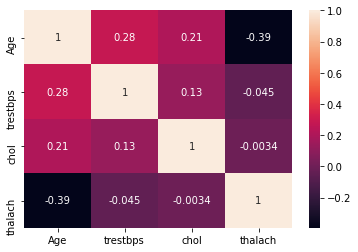

In [22]:
import seaborn as sns
data = file.drop(['id','Sex','cp','fbs','resetecg','exang','slope','ca','thal','num'],axis =1)
data.head(10)
Var_Corr = data.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

It can be observed that resting blood pressure and serum cholestrol level are most correlated with age.

4. From your understanding, which of the features can be labeled as discrete
random variables and which features as continuous random variables?
(1 point)

Features which can be labelled as:

- discrete random variables : id, age, sex, ca 
- continuous random variables : cp, trestbps, chol, fbs, resetecg, thalach, exang, slope,thal,num 

5. Describe the distribution for the values of the "thalach" feature? Illustrate with
a plot. (1 point)

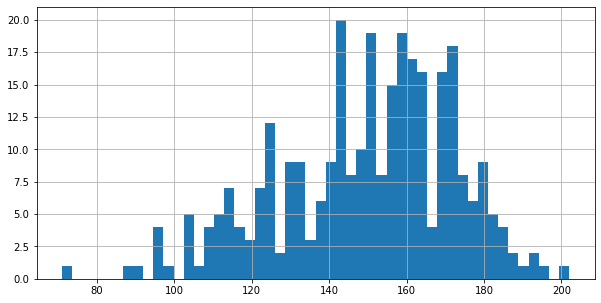

In [23]:
labels = file['thalach']
labels.hist(bins=50, figsize =(10,5))
plt.show()

Thalach feature in the given dataset describes maximum heart rate achieved. It can be observed from the above graph that the frequency of heart rate lies in the range of 140-180 in the given dataset.

6. Plot the frequency of “Sex” variable in the dataset and describe what you
observe in the plot. Similarly plot and describe the 'ca' feature for the male
participants. (2 points)

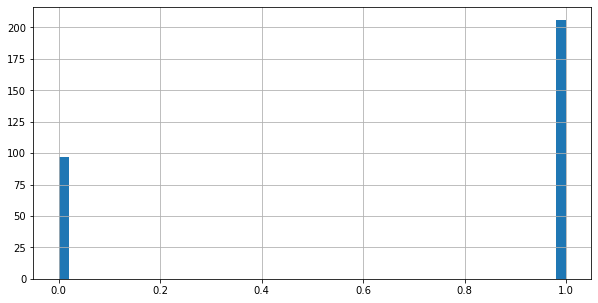

In [24]:
sex = file['Sex']
sex.hist(bins=50, figsize =(10,5))
plt.show()

For the 'sex' plot, value = 0 for females and value = 1 for males.

The dataset has almost double frequency of males over females.

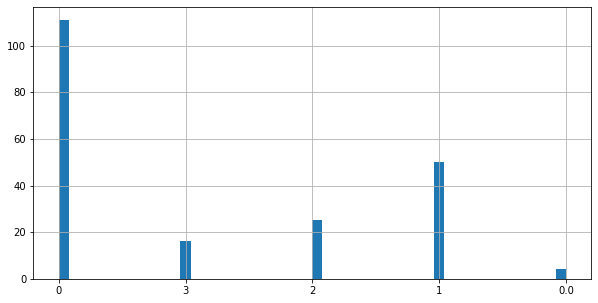

In [25]:
male= file.loc[file['Sex'] == 1]
ca_male = male['ca']
ca_male.hist(bins=50, figsize =(10,5))
plt.show()

In the dataset, 'ca' tells about the number of major vessels labelled from 0-3. In males, the most common vessel is with can value 0

7. Detect outlier patients for features "trestbps'' and "chol". Illustrate with plots.
(2 points)

When plotting a boxplot, the outlier is the data point which is located outside the whiskers of box plot.

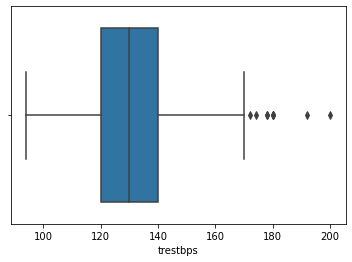

In [26]:
import seaborn as sns
sns.boxplot(x=file['trestbps'])

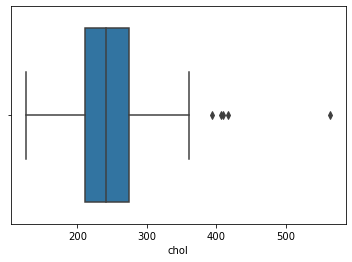

In [27]:
import seaborn as sns
sns.boxplot(x=file['chol'])

# Exercise 2 - Probability (total: 4 points)

1. Suppose a discrete random variable, MMSE (Mini mental state examination),
cognitive test measured for Alzheimer’s disease (AD) has the following
probability mass function:

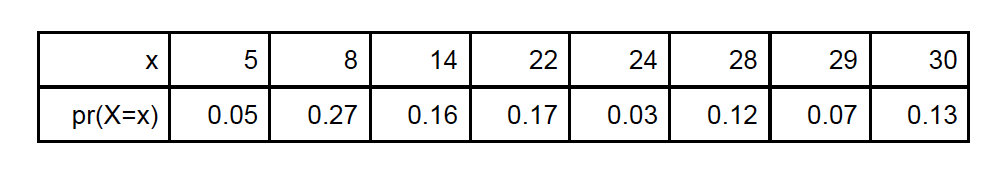

Find the probability that MMSE:
    
a) at least 22 (1 point)

b) at least 14 and at most 28 (1 point)

In [ ]:
pmf_dict = {'5' : 0.05,'8':0.27,'14':0.16,'22':0.17,'24':0.03,'28':0.12,'29':0.07,'30':0.13}


sum = 0
for i in pmf_dict.keys():
    if int(i) >= 22:
        sum += pmf_dict[i]
print("Probability that MMSE is atleast 22: {}".format(sum))

sum = 0
for i in pmf_dict.keys():
    if 14 <= int(i) <= 28 :
        sum += pmf_dict[i] 
print("Probability that MMSE is atleast 14 and at most 28: {}".format(sum)) 

Probability that MMSE is atleast 22: 0.52
Probability that MMSE is atleast 14 and at most 28: 0.48


2. A company produced antibody testing kits for COVID-19. The false positive
rate of the test is known to be 3%. What is the probability to find at least 2
false positive results within 35 tested patients? (2 points)

In [ ]:
from scipy.stats import binom

""" Probability of finding atleast 2 positive = 1 - probability of finding 1 positive"""

n = 35
p = 0.03
k = 1
probability = round(1 - binom.pmf(k,n,p),2) 

print("Probability of finding atleast 2 false positive results is {}".format(probability)) 

Probability of finding atleast 2 false positive results is 0.63


# Exercise 3 - Hypothesis Testing (total: 8 points)

Using the processed dataset from question 1 answer the following questions.


1. Are all the criteria for carrying out a t-test to identify a significant difference in
the age of patients who have heart disease and those who don’t, met?
(3 points)


○ If the criteria is met, carry out a t-test using Python.


○ And if not, point out the unmet conditions for the variables, and mention
a possible solution in-order to combat this issue.

In [3]:
#Importing all Libraries necessary

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy
import scipy.stats as stats
import math
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Opening and Reading CSV File

PCD = pd.read_csv("DS_processedClevelandData.csv")
PCD.head(11)

,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3,2.0,3.0,1
7,8,57,0,4,120,354,0,0,163,1,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,2,1.0,7.0,1
9,10,53,1,4,140,203,1,2,155,1,3,0.0,7.0,1


In [5]:
PCD.columns

Index(['id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'resetecg',
       'thalach', 'exang', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
print(PCD.shape)
print("----------------------------------------------------", "\n")
print('Length of the data {}'.format(len(PCD)))
print("----------------------------------------------------", "\n")
print(PCD.info())

(303, 14)
---------------------------------------------------- 

Length of the data 303
---------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        303 non-null    int64 
 1   Age       303 non-null    int64 
 2   Sex       303 non-null    int64 
 3   cp        303 non-null    int64 
 4   trestbps  303 non-null    int64 
 5   chol      303 non-null    int64 
 6   fbs       303 non-null    int64 
 7   resetecg  303 non-null    int64 
 8   thalach   303 non-null    int64 
 9   exang     303 non-null    int64 
 10  slope     303 non-null    int64 
 11  ca        303 non-null    object
 12  thal      303 non-null    object
 13  num       303 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 33.3+ KB
None


In [7]:
print (PCD.describe())

               id         Age         Sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.000000  211.000000   
50%    152.000000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    227.500000   61.000000    1.000000    4.000000  140.000000  275.000000   
max    303.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs    resetecg     thalach       exang       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.148515    0.990099  149.607261    0.326733    1.600660    0.458746  
std      0.356198    0.994971 

In [8]:
PCD.Age.mean()

54.43894389438944

Criteria:

1. Variables: We have One Numerical variable ("Age") and One Categorical Variable ("Num") to compare - So, we can use t-test for comparision of significant difference - we use two sample t-test as one is continuous variable and the other is qualitative variable.

2. Check Distribution of means of ages who have heart disease and who dont have

3. Calculating the mean, stdev.

4. Defining Hypothesis for t-test

Null Hypothesis: Average age of the person having a heart disease is less than the person who doesn't have heart disease.

Alternate Hypothesis: Average age of the person having a heart disease is more than the person who doesn't have heart disease.

[Text(0.5, 0, 'Age Without Heart Disease')]

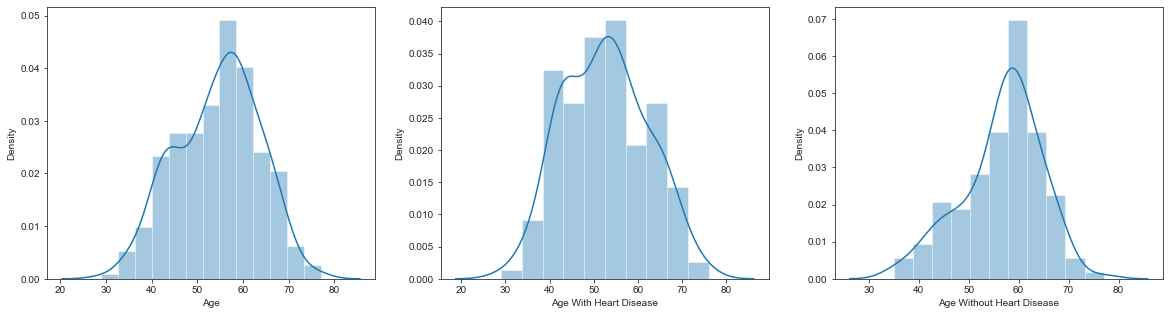

In [9]:
sns.set_style("ticks")

age_heart_disease = PCD.groupby('num')['Age']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sns.distplot(PCD['Age'],ax=axis1)
ax.set(xlabel='Age')
ax = sns.distplot(age_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='Age With Heart Disease')
ax = sns.distplot(age_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='Age Without Heart Disease')

We can see the Mean distribution is diffrent for both in above plots. So, we can perform t-test for Comaprision.

In [10]:
g_mean = PCD.groupby('Sex')['Age'].mean()
g_std = PCD.groupby('Sex')['Age'].std()

DataFrame = pd.DataFrame({'Group':[0,1],'Sample_Age_Mean':g_mean.values,'Sample_Age_Std':g_std.values,'Sample_Size':
                      [len(PCD.Age[PCD['Sex'] == 0]),len(PCD.Age[PCD['Sex'] == 1])]})
DataFrame 

,Group,Sample_Age_Mean,Sample_Age_Std,Sample_Size
0,0,55.721649,9.370546,97
1,1,53.834951,8.836838,206


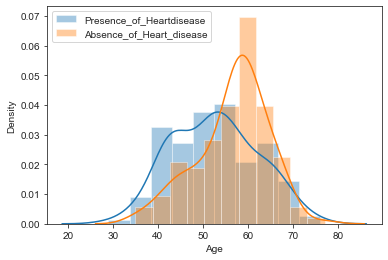

In [11]:
sns.distplot(age_heart_disease.get_group(0),label='Presence_of_Heartdisease')
sns.distplot(age_heart_disease.get_group(1),label='Absence_of_Heart_disease')
plt.legend()

This above plot shows that that distribution of age of persons who doesnot have heart disease is lower than the distrubution of age who has heart disease.

In [12]:
#Running T-Test from scipy library

In [13]:
stats.ttest_ind(PCD.Age[PCD['num'] == 0],PCD.Age[PCD['num'] == 1],equal_var=False)

Ttest_indResult(statistic=-4.0303470663221095, pvalue=7.061439075547293e-05)

As already known, p value is 0.05, and for the current test, p value is less than 0.05 and so, null hypothesis is rejected and defined alternate hypothesis is true.

2. Identify if women are significantly more likely to get heart disease than men?
(2 points)

In [14]:
PCD2 = PCD.copy()

In [15]:
def change_sex(Sex):
    if Sex == 0:
        return 'female'
    else:
        return 'male'
PCD2['Sex'] = PCD2['Sex'].apply(change_sex)

In [16]:
def presence(num):
    if num == 0:
        return "No Heart disease"
    else:
        return "Presence of Heart Disease"
PCD2['num'] = PCD2['num'].apply(presence)

Text(0.5, 1.0, 'Gender v/s Heart Disease\n')

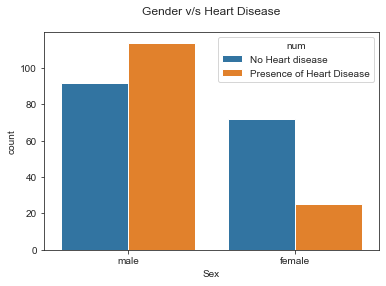

In [17]:
sns.countplot(data=PCD2, x="Sex", hue="num")
plt.title('Gender v/s Heart Disease\n')

The above graph shows that the Women are not more likely to get Heart disease when compared to Men.

3. Inform yourself about χ²−test. And using χ²−test, identify if there is a
significant association between exercise induced angina (exang), and the
slope of the peak exercise ST segment (slope)? (3 points)

# what is x square test

The aim of the test is to conclude whether there is an accociation between two variables or not
we need to consider following things

The Contingency Table :
A Contingency table (also called crosstab) is used summarise the relationship between categorical variables.

Null hypothesis:
We start by defining the null hypothesis (H0) which states that there is no relation between the variables. 
An alternate hypothesis would state that there is a significant relation between the two.

In [ ]:
# contigency table
contigency= pd.crosstab(PCD['exang'], PCD['slope']) 
contigency

slope,1,2,3
exang,,,
0,116,76,12
1,26,64,9


In [ ]:
from scipy.stats import chi2_contingency
#It gives test statistics, the p-value, degrees of freedom and expected table
c, p, dof, expected = chi2_contingency(contigency) 

In [ ]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
#we need to compare the obtained p-value with alpha value
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.490090811425977e-06
Dependent (reject H0)


As we reject H0, So, the variable exang have a significant association with variable slope.